## <b> Loading required packages </b>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## <b>Reusable functions </b>

Creating this section, to use the codes across the notebook 

In [5]:
''' Correlation Analysis'''
def correlation_matrix(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


#Outlier Analysis
def outlier_analysis(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    for col in numeric_cols:
        print("Analyzing Column:", col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"  Total outliers in {col}: {len(outliers)}")
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=numeric_cols[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

## <b> Products Dataset Analysis </b>

In [6]:
products_df = pd.read_csv('products_takehome.csv')

In [7]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [8]:
products_df.info()
''' 
checking in to see the data type of all the columns in here
We can notice that BARCODE is an float64 data type, which is not ideal for a barcode.
As they are being stored in scientific notation, we have to convert them to string
It also prevents loosing the leading zeros if any in BARCODE 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


' \nchecking in to see the data type of all the columns in here\nWe can notice that BARCODE is an float64 data type, which is not ideal for a barcode.\nAs they are being stored in scientific notation, we have to convert them to string\nIt also prevents loosing the leading zeros if any in BARCODE \n'

In [9]:
'''Converting BARCODE to string'''
products_df['BARCODE'] = products_df['BARCODE'].astype(str)
products_df.info()
products_df['BARCODE'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845441 non-null  object
 1   CATEGORY_2    844128 non-null  object
 2   CATEGORY_3    784986 non-null  object
 3   CATEGORY_4    67459 non-null   object
 4   MANUFACTURER  619078 non-null  object
 5   BRAND         619080 non-null  object
 6   BARCODE       845552 non-null  object
dtypes: object(7)
memory usage: 45.2+ MB


0    796494407820.0
1     23278011028.0
2    461817824225.0
3     35000466815.0
4    806810850459.0
Name: BARCODE, dtype: object

### Checking Nulls

In [10]:
products_df.isnull().sum() 
'''this shows all the columns have a large of null values, we will need 
to clean the data'''

'this shows all the columns have a large of null values, we will need \nto clean the data'

### Checking for special/invalid characters

In [11]:
'''
Findings:
the above shows the special characters in the column. 
We can see there are some brand names have invalid names like 'MY*T*FINE', 'AOWA: 10008', 'RO*TEL'
We need to confirm with the stakeholder if brand names trademark logo should be included in the name or not.

While most of the other names are valid. 
'''

#checking for any special characters in the columns
for col in products_df.columns:
    if products_df[col].dtype == 'object':
        special_characters = products_df[products_df[col].str.contains(r'[^\w\s&\'’!.\-,+()®/]',regex=True, na=False)]
        print(f"\n the following are the special characters in the column : \n {col}")
        print(special_characters[col].unique())


 the following are the special characters in the column : 
 CATEGORY_1
[]

 the following are the special characters in the column : 
 CATEGORY_2
[]

 the following are the special characters in the column : 
 CATEGORY_3
[]

 the following are the special characters in the column : 
 CATEGORY_4
[]

 the following are the special characters in the column : 
 MANUFACTURER
['BROWN‑FORMAN']

 the following are the special characters in the column : 
 BRAND
['FLINTSTONES™ VITAMINS' 'THERA°PEARL' 'ZIOKOK: 13063' 'MY*T*FINE'
 'AOWA: 10008' 'BOOBIE* SUPERFOODS' 'PRICE*S' 'TRUPEONY: 10227'
 'JETTINGBUY:10073' 'DELIA*S' 'AVATAR: THE LAST AIRBENDER' 'RO*TEL']

 the following are the special characters in the column : 
 BARCODE
[]


### Finding Duplicates

In [12]:
''' 
There are 215 duplicates in the data and needs to be dropped
'''
print(f"Number of duplicates in Products df: {products_df.duplicated().sum()}")

Number of duplicates in Products df: 215


#### Checking Unique values

In [13]:
''' Checking unique values in all the columns to identify any random erroneous values'''
for col in products_df.columns:
    if products_df[col].dtype == 'object':
        print(f"\n the following are the unique values in the column : \n {col}")
        print(products_df[col].unique())


 the following are the unique values in the column : 
 CATEGORY_1
['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']

 the following are the unique values in the column : 
 CATEGORY_2
['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments' 'Deodorant & Antiperspirant' 'Snack Bars' nan
 'Bath & Body' 'Nuts & Seeds' 'Candy' 'Cookies' 'Variety Snack Packs'
 'Hair Removal' 'Medical Supplies & Equipment' 'Chips' 'Snack Cakes'
 'Skin Care' 'Dessert Toppings' 'Eye Care' 'Fruit & Vegetable Snacks'
 'Snack Mixes' 'Crackers' 'Jerky & Dried Meat'
 'Topical Muscle & Joint Relief Treatments' 'Foot Care' 'First Aid'
 

In [14]:
'''
from checking the unique values in the colunms 
I noticed a PLACEHOLDER column in MANUFACTURER column

Need to confirm with the stakeholder if this is a valid manufacturer name or not
'''

print(products_df[products_df['MANUFACTURER'].str.contains('PLACEHOLDER',na=False)])

               CATEGORY_1                CATEGORY_2  \
2       Health & Wellness                 Hair Care   
5       Health & Wellness                 Hair Care   
11      Health & Wellness    Medicines & Treatments   
12      Health & Wellness               Bath & Body   
15      Health & Wellness                 Hair Care   
...                   ...                       ...   
845495             Snacks  Fruit & Vegetable Snacks   
845518  Health & Wellness                 Skin Care   
845533  Health & Wellness                 Hair Care   
845535             Snacks                     Candy   
845544             Snacks         Pudding & Gelatin   

                       CATEGORY_3            CATEGORY_4  \
2           Hair Care Accessories                   NaN   
5           Hair Care Accessories                   NaN   
11                Skin Treatments                   NaN   
12            Hand & Body Lotions                   NaN   
15                     Hair Tools  Hair Brus

#### Analyzing BARCODE column 

Category
Invalid(≤10 digits)      7544
Valid(>10 digits)      838008
Name: COUNT, dtype: int64


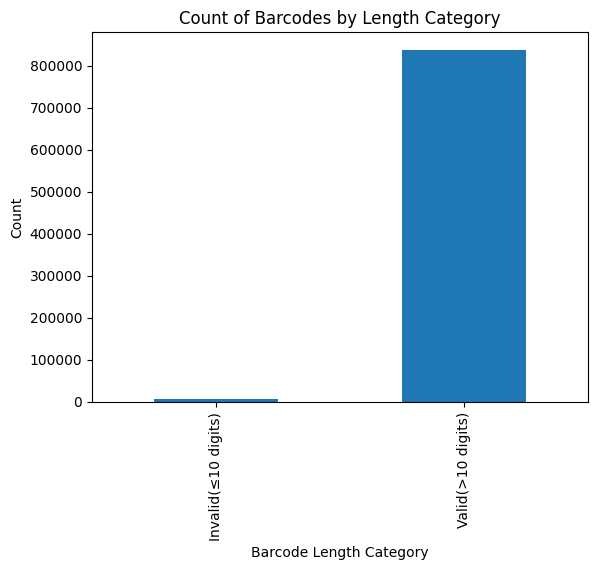

In [15]:
'''
Findings: 
The count of barcodes with string length less than 10 are 7544 
and there is a high chance these barcodes are invalid due to the fact that 
barcodes are supposed to be greater than 11 digits long.

For further confirmation, we need to get the stakeholder's input on this.
'''
# Compute the barcode lengths
barcode_lengths = products_df['BARCODE'].str.len()

# Counting the occurrences of each barcode length
barcode_length_counts = barcode_lengths.value_counts().reset_index()
barcode_length_counts.columns = ['BARCODE_LENGTH', 'COUNT']

# Categorizing the barcodes into greather than and less than 10 groups
barcode_length_counts['Category'] = barcode_length_counts['BARCODE_LENGTH'].apply(
    lambda x: 'Valid(>10 digits)' if x > 10 else 'Invalid(≤10 digits)'
)

# Group by category and sum counts
grouped_counts = barcode_length_counts.groupby('Category')['COUNT'].sum()

# Display results and plotting the bar plot with the results
print(grouped_counts)
grouped_counts.plot(kind='bar')
plt.xlabel('Barcode Length Category')
plt.ylabel('Count')
plt.title('Count of Barcodes by Length Category')
plt.show()


#### Finding Multiple manufactures for same brand

In [16]:
'''
Just to check if there are any mismatches between BRAND and MANUFACTURER columns
As there is a high chance that most of the brands are manufactured by the same manufacturer
'''
mismatch_brands = products_df.groupby('BRAND')['MANUFACTURER'].nunique()
print(mismatch_brands[mismatch_brands > 1])  # Brands linked to multiple manufacturers


BRAND
CHAPSTICK               2
LE PETIT MARSEILIAIS    3
TYGAZ                   2
Name: MANUFACTURER, dtype: int64


#### Checking the presence of Generic names in column

In [17]:
generic_names = ['UNKNOWN', 'N/A', 'NULL', 'MISSING']
print(products_df[products_df['BRAND'].str.upper().isin(generic_names)])


Empty DataFrame
Columns: [CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND, BARCODE]
Index: []


### <b>Data Observations/Data Quality Findings for Products dataset</b>
#### Please note that the detailed findinds are provided as comments inside the code block. This section summarizes all the data cleaning efforts taken care. 

Most of the columns have a lot of nulls values 

There are 200+ duplicates in the products dataset

There are some special chacters found in some of the columns. Needs verification from stakehodlers

Converted BARCODE to object datatype as BARCODE it might loose any leading zeros and in general no numerical calcualtions are performed on BARCODE columns

Analyzed the length of barcodes

Checking to see if the same brand has multiple manufacturers 

Found PLACEHOLDER_MANUFACTER values in the Manufacturer column

Analyzed the unique values to see for any invalid/errorneous values 



### Assumptions

- Considering Barcode lengths less than 10 are invalid
- Some of the brand names have names with invalid characters for example: MY*T*FINE
- As most of the brand have same manufacturer in most cases, filtered out the brand 
that are having multiple manufacturers

### Conclusions

There are a lot nulls and duplicates present in the dataset.

We can notice few special characters as shown in the special character findings code block

The barcode with lengths less than 10 might be erroneous data

There are some placeholders in the MANUFACTURE name column


## <b> TRANSACTION Dataset Analysis </b>

In [18]:
transaction_df = pd.read_csv('transaction_takehome.csv')
transaction_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [19]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [20]:
'''
Barcode column is of type float64, which is not ideal for a barcode and 
converting it to string to prevent scientific notation
'''
transaction_df['BARCODE'] = transaction_df['BARCODE'].astype(str)
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RECEIPT_ID      50000 non-null  object
 1   PURCHASE_DATE   50000 non-null  object
 2   SCAN_DATE       50000 non-null  object
 3   STORE_NAME      50000 non-null  object
 4   USER_ID         50000 non-null  object
 5   BARCODE         50000 non-null  object
 6   FINAL_QUANTITY  50000 non-null  object
 7   FINAL_SALE      50000 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


#### Finding Special Characters

In [21]:
''' Finding special_characters in the columns'''
import warnings
warnings.filterwarnings('ignore') #to ignore warnings

column_to_check = ['STORE_NAME','USER_ID','BARCODE','RECEIPT_ID']
for col in column_to_check:
    special_characters = transaction_df[transaction_df[col].str.contains(r'([^\w\s\-,&.\'\’])', regex=True, na=False)]
    print(f"\n the following are the special characters in the column : \n {col}")
    print(special_characters[col].unique())

''' 
There appears to be some special characters in the columns 
We need to confirm with the stakeholder if these are valid characters or not
Eg: 'CAMIL/DOTLAR' , 'THE S HHANT OR 2010 MMILY RN /TAVES', '/MART'
'''


 the following are the special characters in the column : 
 STORE_NAME
['CAMIL/DOTLAR' 'SELEDLOS BE TODO/AGUSTO'
 'THE S HHANT OR 2010 MMILY RN /TAVES' '/MART' 'RELECIOS A/MEOR PRECIOR']

 the following are the special characters in the column : 
 USER_ID
[]

 the following are the special characters in the column : 
 BARCODE
[]

 the following are the special characters in the column : 
 RECEIPT_ID
[]


" \nThere appears to be some special characters in the columns \nWe need to confirm with the stakeholder if these are valid characters or not\nEg: 'CAMIL/DOTLAR' , 'THE S HHANT OR 2010 MMILY RN /TAVES', '/MART'\n"

In [22]:
''' 
Checking special characters in Final_Quantiy and Final_Sales columns 
Checking these seperately as these are numeric columns and 
should not have any special characters
'''
numeric_columns = ['FINAL_QUANTITY', 'FINAL_SALE']
for col in numeric_columns:
    special_characters = transaction_df[transaction_df[col].str.contains(r'([^\d\.\-])', regex=True, na=False)]
    print(f"\n the following are the special characters in the column : \n {col}")
    print(special_characters[col].unique())

''' 
Findings:
Both the columns have special characters and were created with object data type

'''


 the following are the special characters in the column : 
 FINAL_QUANTITY
['zero']

 the following are the special characters in the column : 
 FINAL_SALE
[' ']


' \nFindings:\nBoth the columns have special characters and were created with object data type\n\n'

#### Column data type issues

In [23]:
''' 
Need to convert ZERO to 0 
Need to convert double spaces to null

Once converted need to converted to Numeric columns
'''

# Replace 'zero' (string) with the numeric value 0
transaction_df['FINAL_QUANTITY'] = transaction_df['FINAL_QUANTITY'].replace('zero', 0)

# Convert to numeric to ensure all values are numbers
transaction_df['FINAL_QUANTITY'] = pd.to_numeric(transaction_df['FINAL_QUANTITY'], errors='coerce')

# Replace spaces (' ') with NaN
transaction_df['FINAL_SALE'] = transaction_df['FINAL_SALE'].replace(' ', pd.NA)
transaction_df['FINAL_SALE'] = pd.to_numeric(transaction_df['FINAL_SALE'], errors='coerce')

In [25]:
transaction_df.info()
'''The columns now reflect the correct data types'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         50000 non-null  object             
 6   FINAL_QUANTITY  50000 non-null  float64            
 7   FINAL_SALE      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(4)
memory usage: 3.1+ MB


'The columns now reflect the correct data types'

In [26]:
transaction_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,nan,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.0,NaN


#### Checking nulls

In [47]:
print(transaction_df.isnull().sum())

'''Only FINAL_SALE column has null values'''


RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE               0
FINAL_QUANTITY        0
FINAL_SALE        12500
dtype: int64


'Only FINAL_SALE column has null values'

#### Finding Duplicates

In [28]:
print(f" total number of duplicates: {transaction_df.duplicated().sum()}")

 total number of duplicates: 171


#### Impossible Scenarios

In [29]:
'''Checking to see impossible scenarios in the data as PURCHASE_DATE cant be greater than SCAN_DATE'''

#As scan_date and purchase date are in different format, converting them to the same format
transaction_df['SCAN_DATE'] = transaction_df['SCAN_DATE'].dt.tz_localize(None)
invalid_scan_dates = transaction_df[transaction_df['SCAN_DATE'] < transaction_df['PURCHASE_DATE']]
print(invalid_scan_dates)

                                 RECEIPT_ID PURCHASE_DATE  \
51     008c1dcc-0f96-4b04-98c8-2a2bb63ef89d    2024-07-21   
455    04a320ed-2903-45e5-8fd7-6eaf08daef32    2024-06-29   
494    05023b3d-5f83-47a7-a17c-8e8521d0bc94    2024-09-08   
675    06ce3da3-a588-4c37-93b4-0b6d11e42704    2024-06-22   
870    08d0e78f-3e63-40a3-8eb0-73fdf76da52c    2024-06-22   
...                                     ...           ...   
46034  08d0e78f-3e63-40a3-8eb0-73fdf76da52c    2024-06-22   
46539  718aa730-b62f-4e18-8dba-1d7105dac341    2024-09-05   
46941  af2b818f-4a92-4e98-958c-65f2ce0b271d    2024-06-15   
47653  72bb7b71-d958-4a46-ae62-43abdeb0e693    2024-06-15   
47837  99c2e8dc-9dc7-4267-9342-0b19c3fb35a0    2024-06-15   

                    SCAN_DATE            STORE_NAME                   USER_ID  \
51    2024-07-20 19:54:23.133               WALMART  5dc24cdb682fcf1229d04bd6   
455   2024-06-28 11:03:31.783  DOLLAR GENERAL STORE  62855f67708670299a658035   
494   2024-09-07 22:22:2

#### Examining Skewness in Data

'\nFindings:\nBoth the columns show high skewness with most to the values concentrateed on the left side of the graph\nnear low quantities and having a long tail on right side\n\nThese maybe because of bulk purchases which is a possible scenario or it could also\nbe erroneous data\n\n'

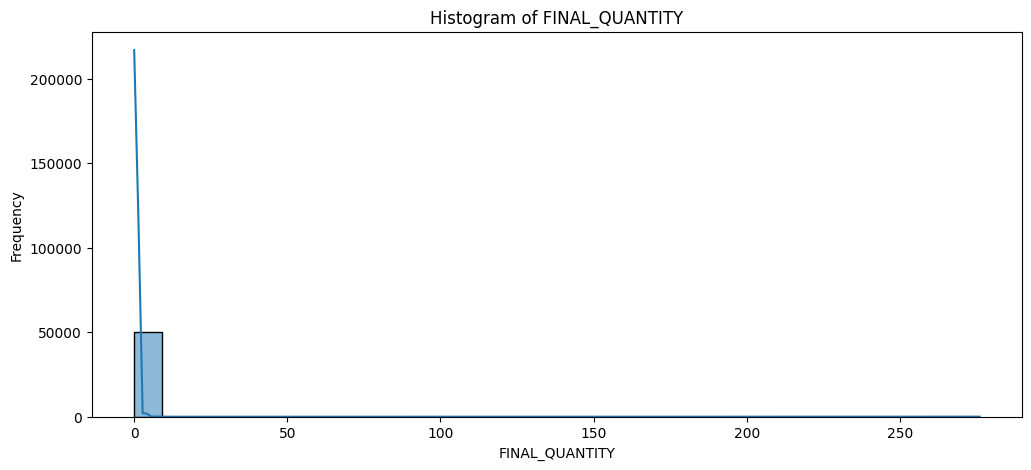

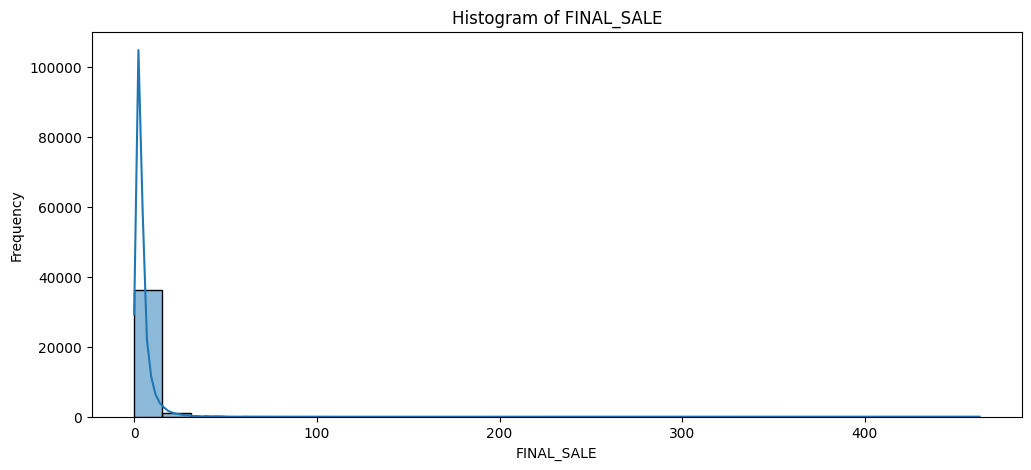

In [30]:
# List of continuous variables
continuous_vars = ['FINAL_QUANTITY', 'FINAL_SALE']

# Plot histograms and boxplots
for col in continuous_vars:
    plt.figure(figsize=(12, 5))

    # Histogram
    sns.histplot(transaction_df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

'''
Findings:
Both the columns show high skewness with most to the values concentrateed on the left side of the graph
near low quantities and having a long tail on right side

These maybe because of bulk purchases which is a possible scenario or it could also
be erroneous data

'''

#### Outlier Analysis

Analyzing Column: FINAL_QUANTITY
  Total outliers in FINAL_QUANTITY: 432


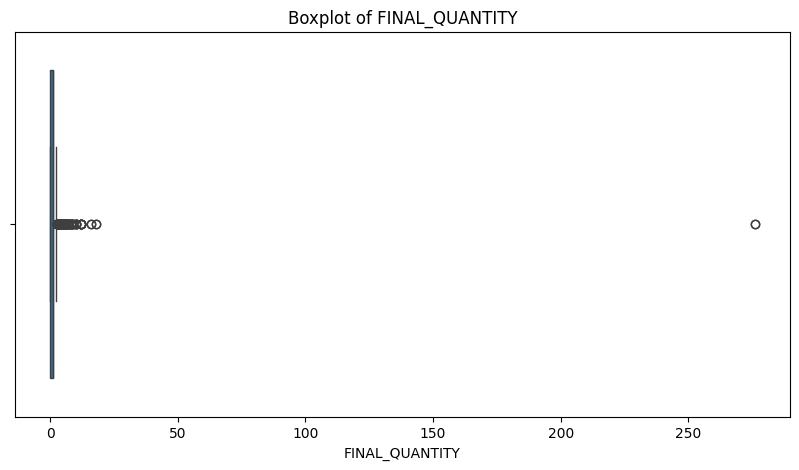

Analyzing Column: FINAL_SALE
  Total outliers in FINAL_SALE: 2984


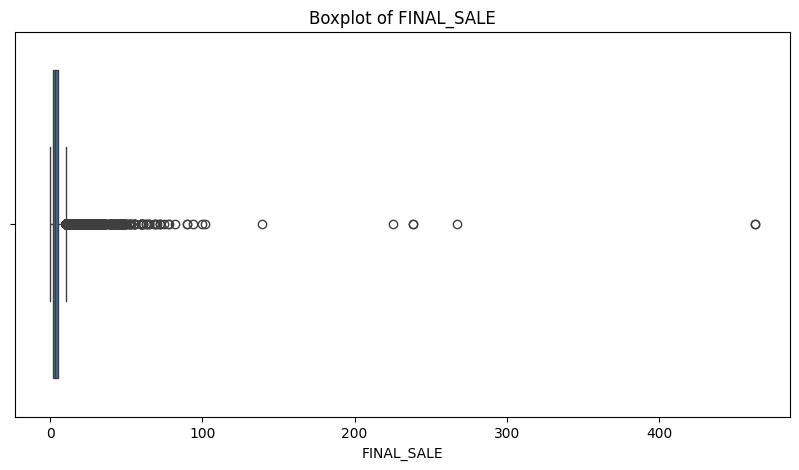

In [ ]:
outlier_analysis(transaction_df)
'''
There are extreme outliers in both the columns indicating high value purchases

Need to investigate if these values are valid or erroneous data
'''

#### Correlation Analysis

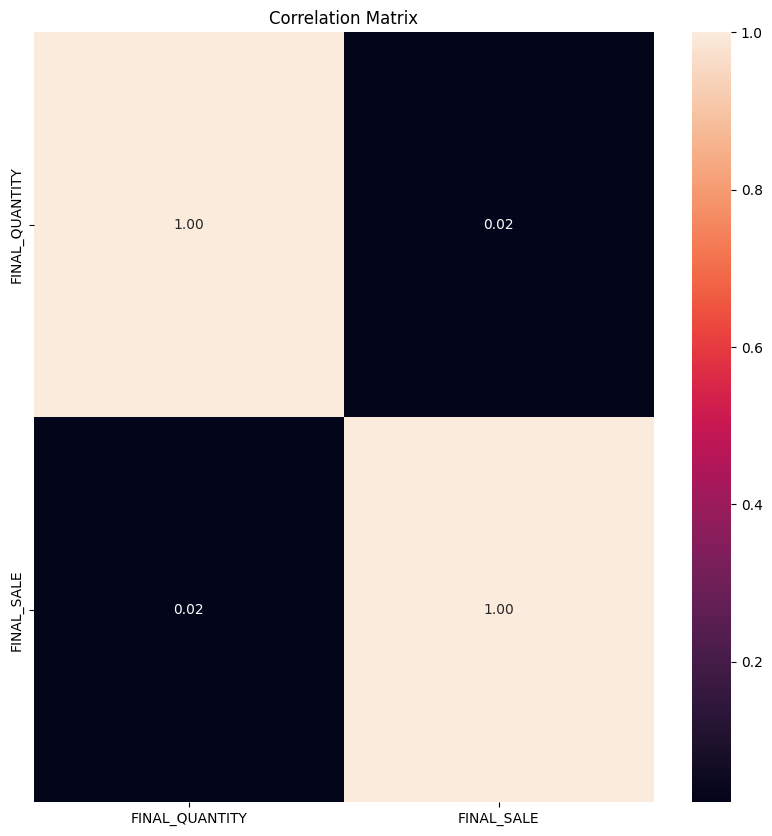

In [33]:
correlation_matrix(transaction_df)

''' 
these is no significant correlation between the columns
the reason might be because there are various products with different prices and 
might have low quantities sold.

So, there is no dependency between the two variables
'''

#### Missing Barcodes

In [ ]:
missing_barcodes = transaction_df[~transaction_df['BARCODE'].isin(products_df['BARCODE'])]
print(missing_barcodes.head())
print(f"\n Number of missing barcodes: \n {len(missing_barcodes)}")

'''This section shows the barcodes that are found in the transaction data 
but not in the product data which is clearly an erroneous data

These should be properly investigated and dropped if needed
'''

                             RECEIPT_ID PURCHASE_DATE               SCAN_DATE  \
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18 2024-08-19 15:38:56.813   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18 2024-06-19 11:03:37.468   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04 2024-07-05 15:56:43.549   
6  000550b2-1480-4c07-950f-ff601f242152    2024-07-06 2024-07-06 19:27:48.586   
8  000e1d35-15e5-46c6-b6b3-33653ed3d27e    2024-08-13 2024-08-13 18:21:07.931   

  STORE_NAME                   USER_ID       BARCODE  FINAL_QUANTITY  \
2    WALMART  60842f207ac8b7729e472020   78742229751             1.0   
3  FOOD LION  63fcd7cea4f8442c3386b589  783399746536             0.0   
4   RANDALLS  6193231ae9b3d75037b0f928   47900501183             1.0   
6    WALMART  5f850bc9cf9431165f3ac175   49200905548             1.0   
8    WALMART  61a6d926f998e47aad33db66   52000011227             1.0   

   FINAL_SALE  
2         NaN  
3        3.49  
4         NaN  
6         NaN  


#### Trend Analysis

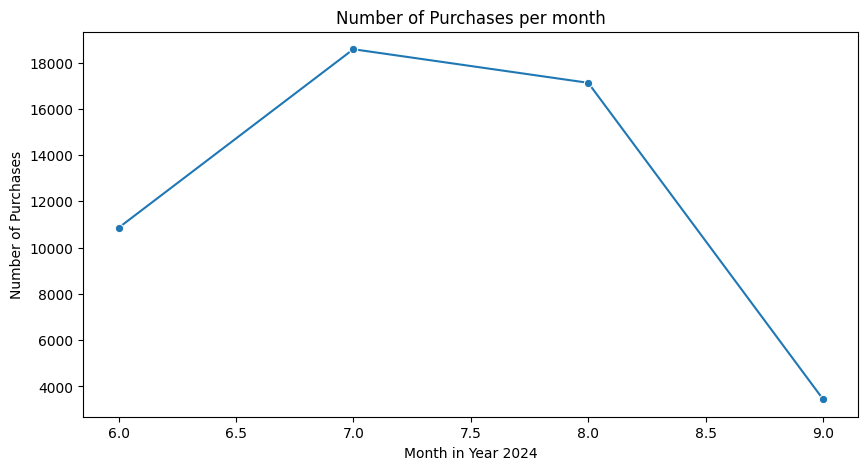

'\nFindings: the below trend shows the number of signups over the years\nwe can see that the signups has grown over the years and peaked at 2022 \nbefore dropping in 2023 and 2024\n'

In [ ]:
# user signups trend by year
purchases_by_year = transaction_df['PURCHASE_DATE'].dt.month.value_counts()

# Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=purchases_by_year.index, y=purchases_by_year.values, marker='o')
plt.xlabel("Month in Year 2024") 
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases per month")
plt.show()

'''
Findings:
The below graph that highest number of purchases were made in the 7th month 
and purchases has drastically dropped in 9th month'''

### <b>Data Observations/Data Quality Findings for Transaction dataset</b>
#### Please note that the detailed findinds are provided as comments inside the code block. This section summarizes all the data cleaning efforts taken care. 


Converted BARCODE to object datatype as BARCODE it might loose any leading zeros and in general no numerical calcualtions are performed on BARCODE columns

FINAL_QUANTITY and FINAL_SALE have datatype issues and convereted to numerical

Checked for Duplicates and Nulls

Checked Skewness in data for continuous variables

Performed outlier and correlation analysis

Checked impossible scenarios where purchase_date > scan_date

Invalid bar_codes are found. These barcodes are present in Transaction dataset but are missing in Product dataset. 


#### Assupmtions

Considered barcode with length less than 10 as invalid

Barcodes present in Transaction and missing in products can be deemed invalid

Continous variables (FINAL_QUANTITY and FINAL_SALE) are highly right skewed and needs to be handled with log function for better analysis.
As if the data is too skewed, applying a log transformation can help normalize it

### Conclusion

Duplicates and Null values are present and needs to be handled accordingly

There are are some extreme outliers and should be handled 

There is very high amount of right skewness in data which is expected with the type of data we have and can be handled by applying log

There are a lot of records where purchase_date>scan_date and should be removed or handled based on the project requirements

There are many invalid barcode meaning these are not assigned to any product from the Products dataset.

## <b> USER Dataset Analysis </b>

In [49]:
#Loading the last dataset which is USER data
user_df = pd.read_csv('user_takehome.csv')
user_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [50]:
#Checking to see the data types of the columns
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


#### Datatype Conversion

In [53]:
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'])
user_df['BIRTH_DATE'] = pd.to_datetime(user_df['BIRTH_DATE'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


#### Checking Special Characters

In [61]:
column_to_check = ['ID','STATE','LANGUAGE','GENDER']
for col in column_to_check:
    special_characters = user_df[user_df[col].str.contains(r'([^\w\s\-\'])', regex=True, na=False)]
    print(f"\n the following are the special characters in the column : \n {col}")
    print(special_characters[col].unique())

''' Findings: There seems to be no special characters in the columns'''


 the following are the special characters in the column : 
 ID
[]

 the following are the special characters in the column : 
 STATE
[]

 the following are the special characters in the column : 
 LANGUAGE
[]

 the following are the special characters in the column : 
 GENDER
[]


' Findings: There seems to be no special characters in the columns'

#### Unique values check

In [57]:
#Checking unique values in all columns

for col in user_df.columns:
    
    print(f"\n the following are the unique values in the column : \n {col}")
    print(user_df[col].unique())

'''
Language has 'es-419' which is a valid language code as per online sources
and can be assumed as valid language
'''


 the following are the unique values in the column : 
 ID
['5ef3b4f17053ab141787697d' '5ff220d383fcfc12622b96bc'
 '6477950aa55bb77a0e27ee10' ... '637d5efdd6f2a49c49934dcb'
 '5f0de23b05d8a6147dc0cafa' '5e7ab436905e9512ff44abc8']

 the following are the unique values in the column : 
 CREATED_DATE
<DatetimeArray>
['2020-06-24 20:17:54+00:00', '2021-01-03 19:53:55+00:00',
 '2023-05-31 18:42:18+00:00', '2023-12-26 01:46:22+00:00',
 '2023-10-28 11:51:50+00:00', '2020-12-23 03:18:11+00:00',
 '2023-09-25 22:57:24+00:00', '2023-04-01 13:30:18+00:00',
 '2022-12-22 21:18:25+00:00', '2022-11-04 17:25:53+00:00',
 ...
 '2023-02-23 00:20:04+00:00', '2021-02-27 20:28:38+00:00',
 '2020-08-03 01:11:50+00:00', '2021-04-24 16:29:11+00:00',
 '2021-01-16 22:23:48+00:00', '2022-02-03 16:46:12+00:00',
 '2022-12-08 13:34:39+00:00', '2022-11-22 23:45:05+00:00',
 '2020-07-14 16:50:04+00:00', '2020-03-25 01:30:30+00:00']
Length: 99942, dtype: datetime64[ns, UTC]

 the following are the unique values in the colu

#### Checking Nulls

In [62]:
user_df.isnull().sum()

'''There are good number of nulls values in majority of the columns'''

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

#### Checking Duplicates

In [ ]:
print(f"Total Duplicates: {user_df.duplicated().sum()}")

'''This is the only dataset that has no duplicates'''

Total Duplicates: 0


#### Trends/Distribution analysis

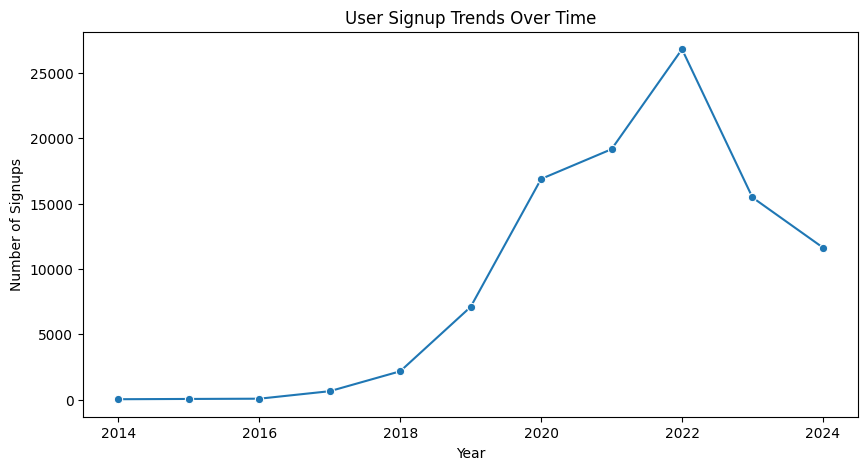

In [70]:
# user signups trend by year
signups_by_year = user_df['CREATED_DATE'].dt.year.value_counts()

# Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=signups_by_year.index, y=signups_by_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.title("User Signup Trends Over Time")
plt.show()

'''
Findings: the below trend shows the number of signups over the years
we can see that the signups has grown over the years and peaked at 2022 
before dropping in 2023 and 2024
'''


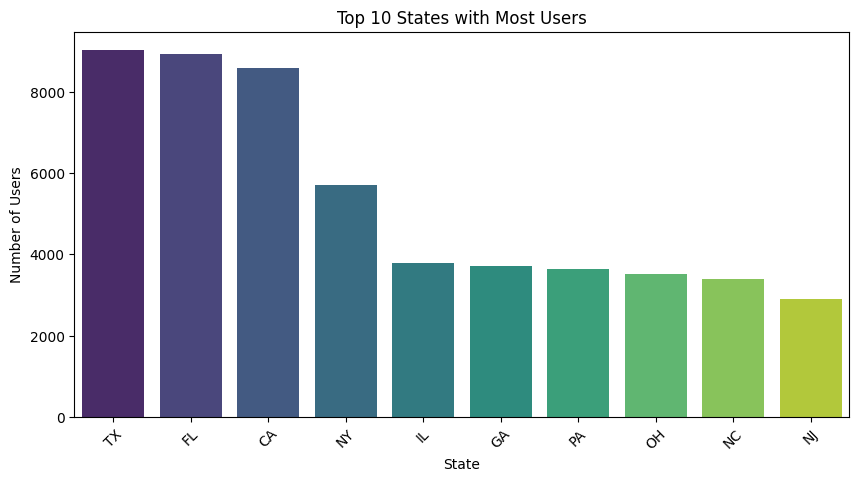

In [73]:
# Top 10 states with most users
users_by_state = user_df['STATE'].value_counts().head(10)

# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=users_by_state.index, y=users_by_state.values, palette='viridis')
plt.xlabel("State")
plt.ylabel("Number of Users")
plt.title("Top 10 States with Most Users")
plt.xticks(rotation=45)
plt.show()

'''findings: the below bar chart shows the top 10 states with most users
We can see that TX, FL, CA,NY has most number of users'''

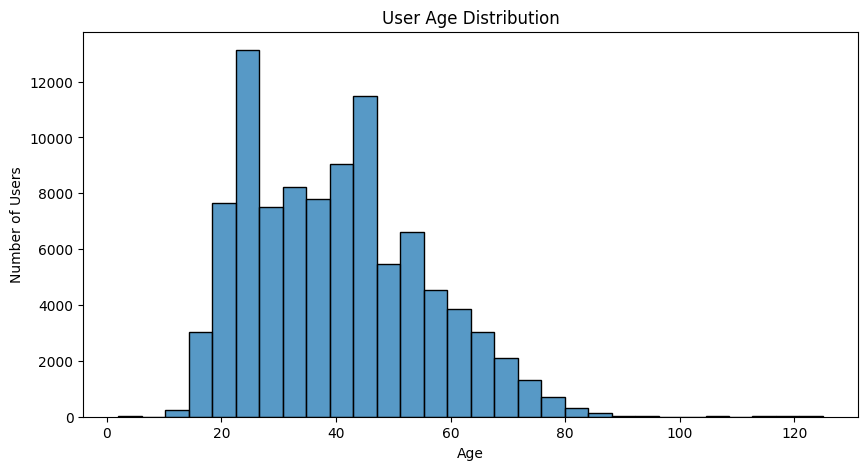

In [99]:
# Compute User Age
from datetime import datetime
user_df['BIRTH_DATE'] = user_df['BIRTH_DATE'].dt.tz_localize(None)
user_df['AGE'] = (datetime.today() - user_df['BIRTH_DATE']).dt.days // 365

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(user_df['AGE'], bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("User Age Distribution")
plt.show()

'''lot of users are spread beteen 20 and 50 years of age'''


### <b> Data Observations/Data Quality summary for USER dataset </b>
#### Please note that the detailed findings are provided as comments inside the code block. This section summarizes all the data cleaning efforts taken care. 

Performed Null and Duplicate checks

Checked invalid or special characters 

Converted dates to datetime timestamps

Checked for unique values to find any erroneous data

Performed Trend analysis

### Conclusion
Most signups has grown over the years and peaked at 2022 before dropping in 2023 and 2024

TX, FL, CA,NY has most number of users

A lot of users are aged between 20 and 50